In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
n=1  # test ID

In [63]:
def get_variable_by_name(id, name):
    file_path = f'../data/{id}/{name}.plk'
    df = pd.read_pickle(file_path)
    return df

def plot_matrix_from_df(df, name):
    matrix_shape = df['value'][0].shape
    is_1d = len(matrix_shape) == 1
    if is_1d:
        plot_1d_array_from_df(df, name)
        return
    sum_matrix = np.zeros(matrix_shape)
    count_matrix = np.zeros(matrix_shape)
    for matrix in df['value']:
        sum_matrix += matrix
        count_matrix += 1
    average_matrix = sum_matrix / count_matrix
    if(matrix_shape[0] > 10):
        figsize=(8,6)
    else:
        figsize=(4,3)
    plt.figure(figsize=figsize)
    sns.heatmap(average_matrix, annot=False, fmt=".2f", cmap='viridis')
    plt.title(f'{name} matrix, average across iterations')

def plot_1d_array_from_df(df, name):
    vector_length = df['value'][0].shape[0]
    sum_vector = np.zeros((vector_length,1))
    count_vector = np.zeros((vector_length,1))
    for vector in df['value']:
        sum_vector += vector
        count_vector += 1
    average_vector = sum_vector / count_vector
    plt.figure(figsize=(7, 0.5)) 
    sns.heatmap(average_vector.reshape(1, -1), fmt=".2f", cmap='viridis',cbar=True, cbar_kws={"shrink": 1, "aspect": 5})
    plt.title(f'{name} vector, average across iterations')
    plt.show()
    

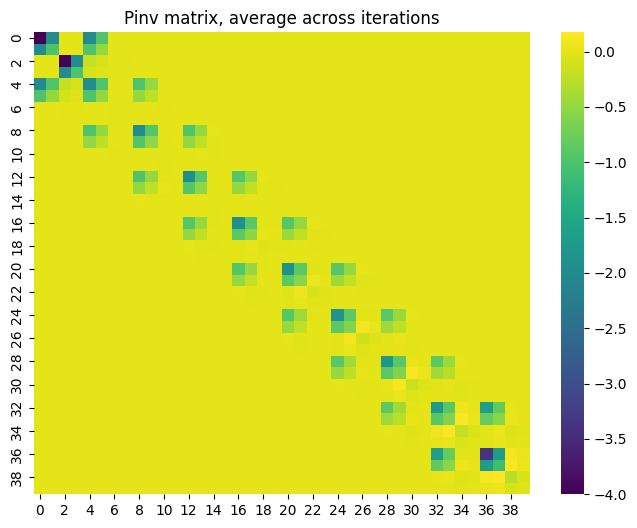

In [24]:
Pinv=get_variable_by_name(n,"Pinv")
plot_matrix_from_df(Pinv, "Pinv")

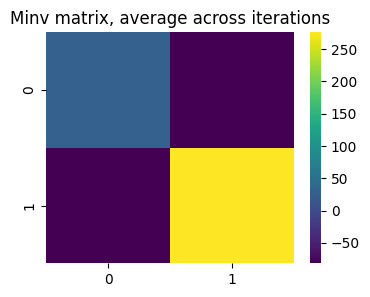

In [26]:
Minv=get_variable_by_name(n,"Minv")
plot_matrix_from_df(Minv, "Minv")

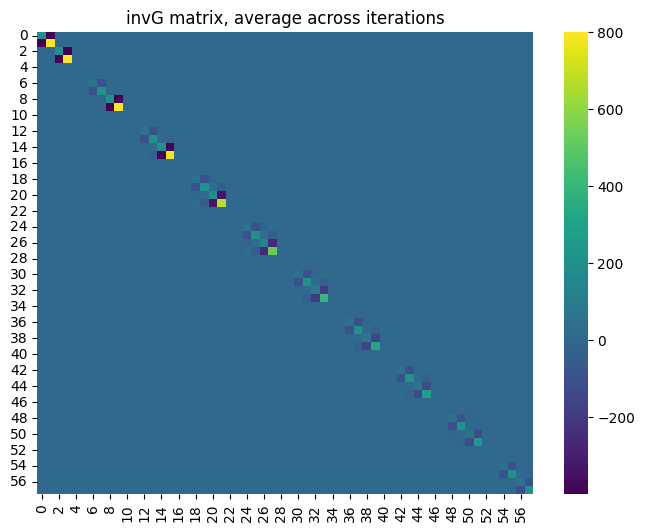

In [27]:
invG=get_variable_by_name(n,"invG")
plot_matrix_from_df(invG, 'invG')

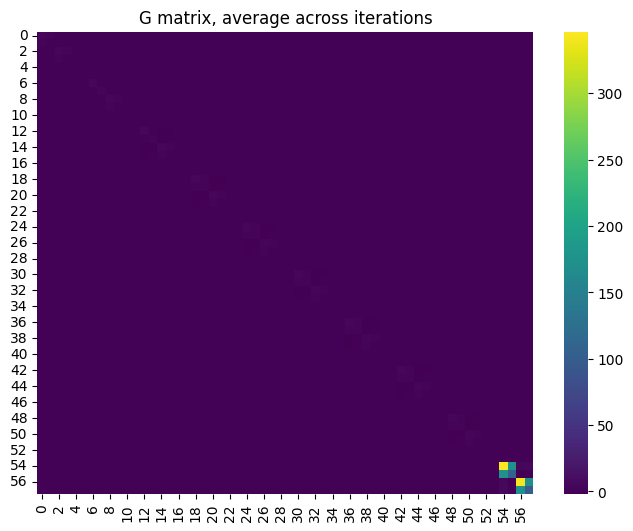

In [28]:
G=get_variable_by_name(n,"G")
plot_matrix_from_df(G, 'G')

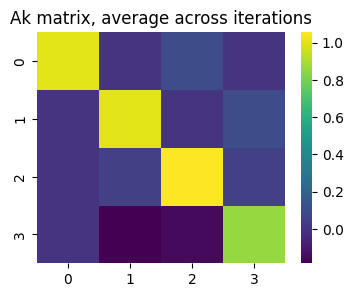

In [29]:
Ak=get_variable_by_name(n,"Ak")
plot_matrix_from_df(Ak, 'Ak')

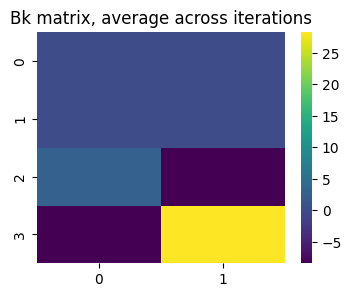

In [30]:
Bk=get_variable_by_name(n,"Bk")
plot_matrix_from_df(Bk, 'Bk')

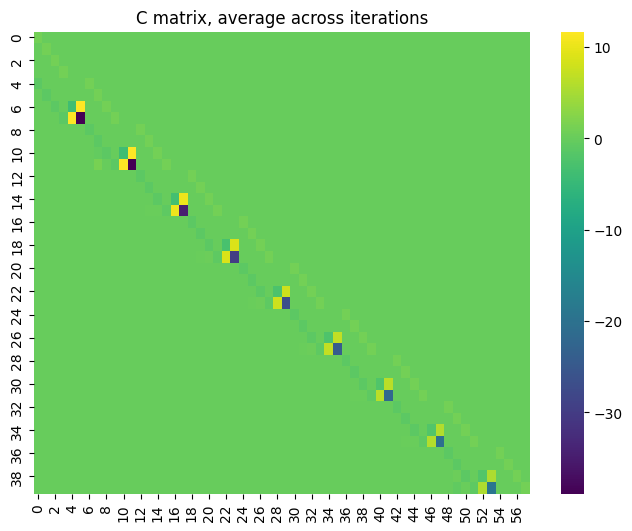

In [37]:
C=get_variable_by_name(n,"C")
plot_matrix_from_df(C, 'C')

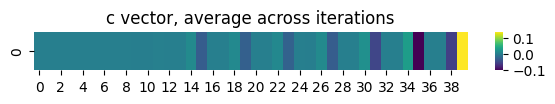

In [64]:
c=get_variable_by_name(n,"c")
plot_1d_array_from_df(c, 'c')

In [ ]:

def plot_cost(df):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.plot(df['dx'], marker='o', linestyle='-', color='green')
    ax1.grid(True)
    ax1.set_title('Norm of the end effector error over time')
    ax1.set_xticklabels([])


    ax2 = ax1.twiny()
    unique_iterations = df['iteration'].unique()
    tick_positions = [df[df['iteration'] == iteration].index[0] for iteration in unique_iterations]
    tick_labels = unique_iterations
    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels(tick_labels)
    ax2.set_xlabel('Iteration')
    ax2.set_position([ax1.get_position().x0, 0.1, ax1.get_position().width, ax1.get_position().height])


    ax3 = ax2.twiny()
    unique__line_iterations = df['line_search_iteration'].unique()
    tick_positions = [df[df['line_search_iteration'] == iteration].index[0] for iteration in unique__line_iterations]
    tick_labels = unique__line_iterations
    ax3.set_xticks(tick_positions)
    ax3.set_xticklabels(tick_labels)
    ax3.set_xlabel('Line Search Iteration')
    ax3.set_position([ax1.get_position().x0, 0.1, ax1.get_position().width, ax1.get_position().height-1.5])

   
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_iterations)))

    for i, iteration in enumerate(unique_iterations):
        mask = df['iteration'] == iteration
        ax1.axvspan(df.index[mask].min(), df.index[mask].max(), color=colors[i], alpha=0.3)

    plt.show()

<Axes: >

<Figure size 500x200 with 0 Axes>

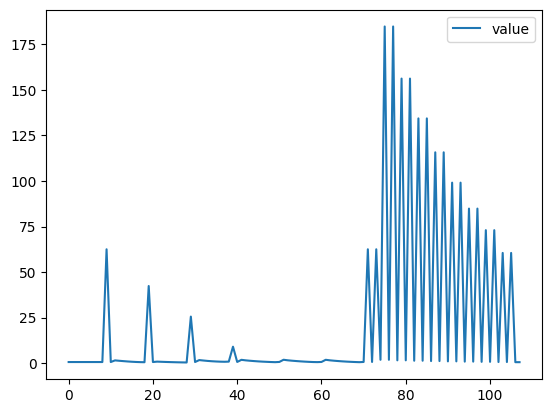

In [67]:
cost= get_variable_by_name(n, 'cost')

plt.figure(figsize=(5, 2))
cost.plot( y='value', kind='line')
# plt.xticks(cost['iteration']) 